In [12]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers
#from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [2]:
df = pd.read_csv(r'E:\ML\DNN\time_series_covid_19_confirmed.csv')
#df = pd.read_csv(r'E:\convid\time_series_covid_19_recovered.csv')

In [3]:
df.head()

,Province/State,Country/Region,Lat,Long,1/22/2020,1/23/2020,1/24/2020,1/25/2020,1/26/2020,1/27/2020,...,3/5/2020,3/6/2020,3/7/2020,3/8/2020,3/9/2020,3/10/2020,3/11/2020,3/12/2020,3/13/2020,3/14/2020
0,NaN,Thailand,15.0000,101.0000,2,3,5,7,8,8,...,47,48,50,50,50,53,59,70,75,82
1,NaN,Japan,36.0000,138.0000,2,1,2,2,4,4,...,360,420,461,502,511,581,639,639,701,773
2,NaN,Singapore,1.2833,103.8333,0,1,3,3,4,5,...,117,130,138,150,150,160,178,178,200,212
3,NaN,Nepal,28.1667,84.2500,0,0,0,1,1,1,...,1,1,1,1,1,1,1,1,1,1
4,NaN,Malaysia,2.5000,112.5000,0,0,0,3,4,4,...,50,83,93,99,117,129,149,149,197,238


In [4]:
df.drop(['Province/State','Country/Region','Lat','Long'],axis=1,inplace=True)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 442 entries, 0 to 441
Data columns (total 53 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   1/22/2020  442 non-null    int64
 1   1/23/2020  442 non-null    int64
 2   1/24/2020  442 non-null    int64
 3   1/25/2020  442 non-null    int64
 4   1/26/2020  442 non-null    int64
 5   1/27/2020  442 non-null    int64
 6   1/28/2020  442 non-null    int64
 7   1/29/2020  442 non-null    int64
 8   1/30/2020  442 non-null    int64
 9   1/31/2020  442 non-null    int64
 10  2/1/2020   442 non-null    int64
 11  2/2/2020   442 non-null    int64
 12  2/3/2020   442 non-null    int64
 13  2/4/2020   442 non-null    int64
 14  2/5/2020   442 non-null    int64
 15  2/6/2020   442 non-null    int64
 16  2/7/2020   442 non-null    int64
 17  2/8/2020   442 non-null    int64
 18  2/9/2020   442 non-null    int64
 19  2/10/2020  442 non-null    int64
 20  2/11/2020  442 non-null    int64
 21  2/12/2020  442 n

In [6]:
dataset = df.copy()
X = np.asarray(dataset.drop('3/14/2020', 1))
y = np.asarray(dataset['3/14/2020'])
sc = StandardScaler()
X_normalized = sc.fit_transform(X)

In [19]:
numDims = X_normalized.shape[1]
dnnModel = tf.keras.Sequential([    
    layers.Dense(16, activation='relu', input_shape=(numDims,)),
    layers.Dense(16, activation='relu'),
    layers.Dense(126, activation='relu'),
    layers.Dense(160, activation='relu'),
    layers.Dense(10, activation='relu'),
    layers.Dense(1)
])
optimizer = tf.keras.optimizers.RMSprop(0.0001)
#optimizer = tf.keras.optimizers.Adam(0.0001)

dnnModel.compile(loss='mse',optimizer=optimizer,metrics=['mae', 'mse'])


In [20]:
dnnModel.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_12 (Dense)             (None, 16)                848       
_________________________________________________________________
dense_13 (Dense)             (None, 16)                272       
_________________________________________________________________
dense_14 (Dense)             (None, 126)               2142      
_________________________________________________________________
dense_15 (Dense)             (None, 160)               20320     
_________________________________________________________________
dense_16 (Dense)             (None, 10)                1610      
_________________________________________________________________
dense_17 (Dense)             (None, 1)                 11        
Total params: 25,203
Trainable params: 25,203
Non-trainable params: 0
__________________________________________________

In [24]:
EPOCHS =500

history = dnnModel.fit(X, y,epochs=EPOCHS, validation_split = 0.2)


Train on 353 samples, validate on 89 samples
Epoch 1/500
353/353 [==============================] - 1s 3ms/sample - loss: 226998219062194.6250 - mae: 1285996.3750 - mse: 226998249062400.0000 - val_loss: 14664334167.6949 - val_mae: 13250.0762 - val_mse: 14664334336.0000
Epoch 2/500
353/353 [==============================] - 0s 195us/sample - loss: 220358355088381.9688 - mae: 1266906.5000 - mse: 220358347063296.0000 - val_loss: 14375154430.1612 - val_mae: 13117.6963 - val_mse: 14375153664.0000
Epoch 3/500
353/353 [==============================] - 0s 239us/sample - loss: 214868280462924.9375 - mae: 1251212.7500 - mse: 214868288339968.0000 - val_loss: 14108404468.0058 - val_mae: 12994.5605 - val_mse: 14108404736.0000
Epoch 4/500
353/353 [==============================] - 0s 215us/sample - loss: 209631617258110.1875 - mae: 1236159.7500 - mse: 209631615909888.0000 - val_loss: 13856314048.2821 - val_mae: 12877.0381 - val_mse: 13856313344.0000
Epoch 5/500
353/353 [============================

In [25]:
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch
hist.tail(10)

,loss,mae,mse,val_loss,val_mae,val_mse,epoch
490,194697.239474,69.764320,194697.250000,3877.644792,7.519834,3877.645020,490
491,286366.875597,86.221054,286366.875000,2157.352294,5.826784,2157.352295,491
492,183206.975410,68.566917,183206.968750,4188.663820,7.782372,4188.664062,492
493,295471.236906,78.012154,295471.218750,1173.029558,4.519740,1173.029541,493
494,549652.128482,97.892220,549652.062500,2587.367504,6.299891,2587.367432,494
495,257903.990130,77.948624,257904.000000,2056.162482,5.708506,2056.162354,495
496,136463.385085,66.821251,136463.390625,2286.034916,5.970903,2286.034912,496
497,158604.122440,69.998222,158604.140625,2245.889373,5.926014,2245.889404,497
498,203595.638636,71.292053,203595.656250,3580.738169,7.257926,3580.738525,498
499,431421.315119,90.442543,431421.312500,1428.941636,4.895414,1428.941650,499


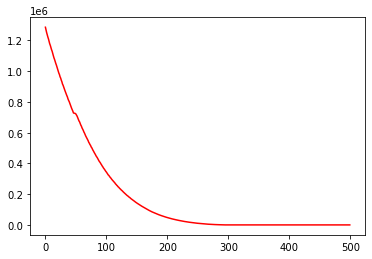

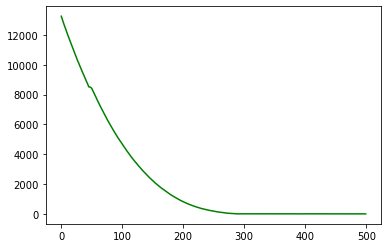

In [26]:
plt.plot(hist['mae'],color='red')
plt.show()
plt.plot(hist['val_mae'],color='green')
plt.show()
